# SIR models


https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/


There is a modified model called SEIR that has been  used to study the COVID epidemic.

https://www.math.u-bordeaux.fr/~pmagal100p/papers/MW-JMB-2018.pdf
    

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

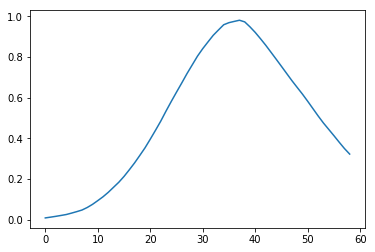

In [2]:
import json

xx = json.load(open('euromomo_curve.json', 'r'))
#tt = [0]*3
tt = []
tt.extend(xx)
tt = np.array(tt)
plt.plot(tt/6)

Here 
- $\tau$ is the transmission rate, 
- $\nu_1$ is the removal rate of reported infected individuals, and
- $\nu_2$ is the removal rate of infected individuals due to all other **unreported causes** : such as mortality, recovery, or other reasons.
      
It is assumed that a reported case, known to medical care-givers or public
health authorities, produces no further cases.

$\nu = \nu_1 + \nu_2$


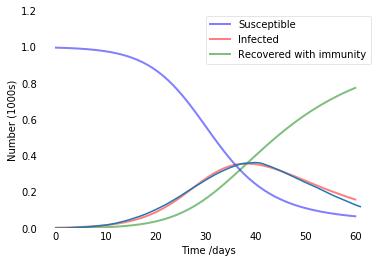

In [3]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.25, 1./14
# A grid of time points (in days)
days = 60
t = np.linspace(0, days, days)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, 
             args=(N, beta, gamma))

S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.plot(tt[:]*.37/6)

N = 1000

$\nu = \nu_1 + \nu_2$

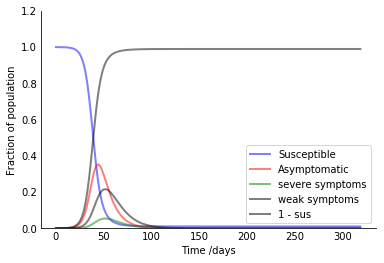

In [11]:
N = 100000

nu = 1/9.5
tau, nu1, nu2, eta = .27, 0.2*nu, .8*nu, 1./9.5

S0, I0 = N, 10

def do_run():

    # The SIRU model differential equations.
    def deriv(y, t, N, tau, nu1,nu2, eta):
        S, I, R, U = y
        dSdt = -tau * S * (I + U) / N
        dIdt = tau * S * (I + U) / N - (nu1 + nu2) * I
        dRdt = nu1 * I - eta * R
        dUdt = nu2 * I - eta * U
        return dSdt, dIdt, dRdt, dUdt
    

    # Initial conditions vector
    
    R0 = U0 = 0
    y0 = S0, I0, R0, U0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0,  
                 np.linspace(0, 320,320), 
                 args=(N, tau, nu1, nu2, eta))
    
    return ret.T/N


S, I, R, U = do_run()
    
    
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot( S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot( I, 'r', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot( R, 'g', alpha=0.5, lw=2, label='severe symptoms')
ax.plot( U, 'k', alpha=0.5, lw=2, label='weak symptoms')
ax.plot(1 - S, 'k', alpha=0.5, lw=2, label='1 - sus')

ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)


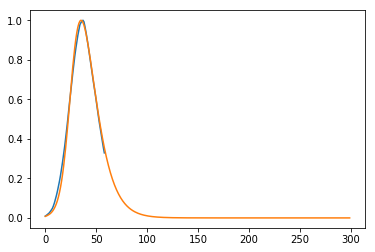

In [35]:

eta = nu = 1/8.3
tau = .256
t = .248
nu1, nu2 = t*nu, (1-t)*nu

S,I,R, U = do_run()

plt.plot(tt[:]/max(tt))
plt.plot(R[20:]/max(R))

8.0 0.054629793997105804 20
8.063157894736841 0.053936351583287356 20
8.126315789473685 0.05340115661536239 20
8.189473684210526 0.05301954808705655 20
8.252631578947367 0.052787818351583055 20
8.31578947368421 0.05270286458099999 20
8.378947368421052 0.05276232565962021 20
8.442105263157895 0.052964465372925186 20
8.505263157894737 0.053307954505175045 20
8.568421052631578 0.05379201362391918 20
8.631578947368421 0.054416214107280286 20
8.694736842105263 0.05518049005507273 20
8.757894736842104 0.0560850569840238 20
8.821052631578947 0.05713041474988077 20
8.884210526315789 0.05831728538609762 20
8.94736842105263 0.05964657318404177 20
9.010526315789473 0.0611193434049022 20
9.073684210526315 0.06273682198505261 20
9.136842105263158 0.06450030530135316 20
9.2 0.06641122130411996 20


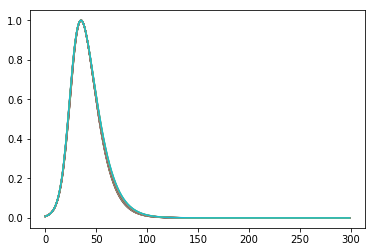

In [34]:
def L2(x):
    return sum(abs(x**2))

N = 100000
S0, I0 = N, 10

eta = nu = 1/9.1
tau = .256
t = .248

for dd in np.linspace(8,9.2,20 ):
    
    eta = nu = 1/dd
    nu1, nu2 = t*nu, (1-t)*nu
    
    S, I, R, U = do_run()

    nn, mm = min([(L2( tt/max(tt) - R[k: k + len(tt)]/max(R)) , k) 
                for k in range(15,25)]) 
    
    plt.plot(R[mm:]/max(R))
    print(dd, nn, mm)
               

In [41]:
for t in np.linspace(.22,.23,20 ):
    eta = nu = 1/ 9.1
    
    nu1, nu2 = t*nu, (1-t)*nu
    
    S, I, R, U = do_run()

    nn, mm = min([(L2( tt/max(tt) - R[k: k + len(tt)]/max(R)) , k) 
                for k in range(6)]) 
    
    plt.plot(R[mm:]/max(R))
    print(t, nn, mm)

(5, 0.5773372790401227)

In [5]:
2*.262

0.524